# Л.Р. 3.

## Задание 1
Модель "Хищник-Жертва" - переделать на Sage.

Необходимо численно решить систему ДУ 1-го порядка:

In [5]:
y1,y2 = var('y1,y2')
a,b,c,d,t = var('a,b,c,d,t')

show(y1*(a - b*y2))
show(y2*(-c + d*y1))

-(b*y2 - a)*y1

(d*y1 - c)*y2

В качестве аналога odient из scipy.integrate возьмем встоенный в sage метод desolve_odeint

' Проведем расчет численности популяций при'

' a = 3, c = 1, d = 1 для трех значений параметра b = 4,3,2.'

' Начальные значения положим x0 = 2, y0 = 1.'

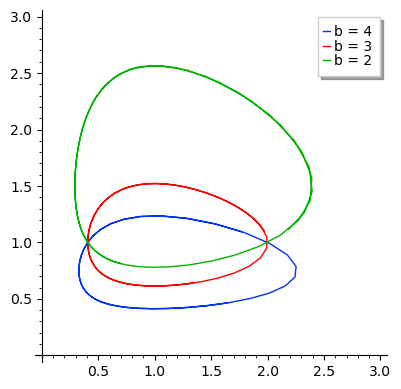

In [6]:
y1,y2 = var('y1,y2')
a,b,c,d,t = var('a,b,c,d,t')

a,b,c,d = [3,4,1,1]
show(" Проведем расчет численности популяций при")
show(" a = 3, c = 1, d = 1 для трех значений параметра b = 4,3,2.")
show(" Начальные значения положим x0 = 2, y0 = 1.")

t = []
for i in range (0,70,1):
    t.append(i/10)
    
ys = [2,1]

r = []
for B in range(4,1,-1):
    f = [y1*(a - B*y2),y2*(-c + d*y1)]
    [xr,yr] = desolve_odeint(f,ys,t,[y1,y2]).T
    
    res = []
    
    for i in range (1,len(xr),1):
        res.append((xr[i],yr[i]))
        
    r.append(res)
        
show(line(r[0],rgbcolor = (0,0.2,0.95),legend_label = "b = 4") + line(r[1],rgbcolor = (1,0,0),legend_label = "b = 3") + line(r[2],rgbcolor = (0,0.7,0),legend_label = "b = 2"), xmin = 0, xmax= 3, ymin = 0, ymax = 3, aspect_ratio = 1)

'Проведем рассчет траекторий для нейизменных a=3,b=3,c=1,d=1 и различных начальных условий:'

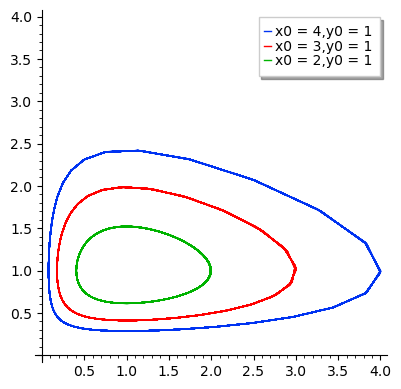

'Больше траекторий (x0,y0 от 0.5 до 4):'

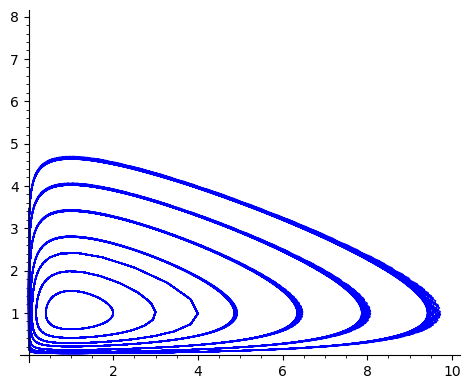

In [40]:
t = []
for i in range (0,1000,1):
    t.append(i/10)
    
y0 = 1
[a,b,c,d] = [3,3,1,1]

r = []
for x0 in range(4,1,-1):
    ys = [x0,y0]
    f = [y1*(a - b*y2),y2*(-c + d*y1)]
    [xr,yr] = desolve_odeint(f,ys,t,[y1,y2]).T
    
    res = []
    for i in range (1,len(xr),1):
        res.append((xr[i],yr[i]))
    r.append(res)
        
show("Проведем рассчет траекторий для нейизменных a=3,b=3,c=1,d=1 и различных начальных условий:")
show(line(r[0],rgbcolor = (0,0.2,0.95),legend_label = "x0 = 4,y0 = 1") + line(r[1],rgbcolor = (1,0,0),legend_label = "x0 = 3,y0 = 1") + line(r[2],rgbcolor = (0,0.7,0),legend_label = "x0 = 2,y0 = 1"), xmin = 0, xmax= 4, ymin = 0, ymax = 4, aspect_ratio = 1)


for y0 in range(8,1,-1):
    params = [3,3,1,1]
    ys = [(y0/2),(y0/2)]
    f = [y1*(a - b*y2),y2*(-c + d*y1)]
    [xr,yr] = desolve_odeint(f,ys,t,[y1,y2]).T
    
    res = []
    for i in range (1,len(xr),1):
        res.append((xr[i],yr[i]))
    r.append(res)
        
show("Больше траекторий (x0,y0 от 0.5 до 4):")
show(line(r[0]) + line(r[1]) + line(r[2]) + line(r[3]) + line(r[4]) + line(r[5]) + line(r[6]), xmin = 0, xmax= 10, ymin = 0, ymax = 8, aspect_ratio = 1)

## Задание 2
Падение тела, брошенного под углом к горизонту - переделать на Sage.

In [1]:
#инициализация солвера
g = 9.81


f = lambda t,y,params:[
            -params[0]*y[0]*sqrt(y[0]^2 + y[1]^2),
            -params[0]*y[1]*sqrt(y[0]^2 + y[1]^2) - g,
             y[0],
             y[1]]

solver = ode_solver()
solver.function = f
solver.algorithm = "rk4"

In [2]:
#функция для преобразоания результата солвинга в массив точек в трехмерном пространстве-времени
# + ищет особоые точки решения и отсекает лишнюю часть прямой
def XYtconstructer(SOLVER):
    XY = []
    i = 0
    for a in SOLVER.solution:
        XY.append([a[1][2],a[1][3],a[0]])

    #оработка массива точек, поиск особых позиций
    prev = [XY[0][0] - 1,XY[0][1] - 1]
    MAR = false #max altitude reached (flag)
    END = false #end reached (flag)
    MAP = [0,0] #max altitude point
    ENP = [0,0] #end point

    RES = []
    for a in XY:
        if(a[1] < prev[1] and MAR == false):
            show("Max alt reached")
            show("at 3D space-time point " + str(prev))
            MAR = true
            MAP = prev
        if(a[1] < 0 and END == false):
            show("End of trajectory reached")
            show("at 3D space-time point " + str(prev))
            END = true
            ENP = prev
        if(not END):
            RES.append(a)

        prev = a
        
    return [RES,MAP,ENP]

'Max alt reached'

'at 3D space-time point [3.31516449357275, 1.5898970094500993, 0.5340000000000004]'

'End of trajectory reached'

'at 3D space-time point [6.007738876506506, 0.00019337332211627305, 1.133999999999996]'

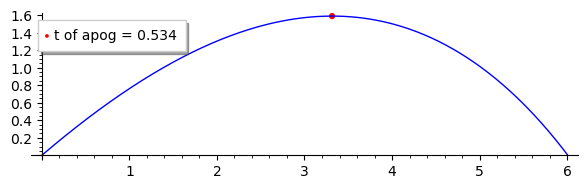

'flight time = 1.133'

'flight distance = 6.007'

'height = 1.589'

In [15]:
#параметры полета
k = 0.1
v0 = 10
alpha = 1.35*pi/6

#поиск решения
solver.ode_solve(y_0 = [cos(alpha)*v0,sin(alpha)*v0,0,0],t_span=[0,3],params = [k],num_points=1000)

#обрабатываем полученный массив точек
[res,MAP,ENP] = XYtconstructer(solver)

#строим график
v = [(x[0],x[1]) for x in res]
graf = line(v)

show( 
     point([MAP[0],MAP[1]],
           legend_label = "t of apog = " + str((int(MAP[2]*1000)/1000).n(prec = 11)),
           hue = 300,
           size = 20)
    + graf,
    
    aspect_ratio = 1
) 
show("flight time = " + str((int(ENP[2]*1000)/1000).n(prec = 15)))
show("flight distance = " + str((int(ENP[0]*1000)/1000).n(prec = 15)))
show("height = " + str((int(MAP[1]*1000)/1000).n(prec = 15)))